# Assignment 2 (10.24) -- 풀이업로드

In [1]:
import torch 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## `1`. 단순회귀모형 -- 풀이생략 (강의노트 참고)

주어진 자료가 아래와 같다고 하자. 

In [2]:
torch.manual_seed(7676)
x = torch.randn(100).sort().values
ϵ = torch.randn(100)*0.5
y = 2.5+ 4*x + ϵ

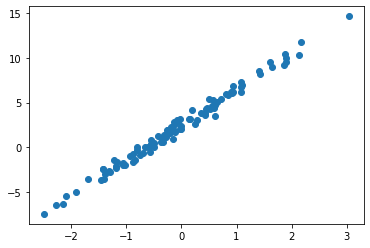

In [3]:
plt.plot(x,y,'o')

아래와 같은 모형을 가정하고 물음에 답하라. 

$$y_i = w_0+w_1 x_i +\epsilon_i, \quad \epsilon_i \overset{iid}{\sim} N(0,\sigma^2)$$

`(1)` $(\hat{w}_0,\hat{w}_1)=(-5,10)$으로 선택하고 $\hat{y}_i$를 계산하라. 

`(2)` $(\hat{w}_0,\hat{w}_1)=(-5,10)$에 대한 MSELoss를 계산하라. 즉 

$$loss(\hat{w}_0,\hat{w}_1)$$ 

를 계산하라. 단, $loss(w_0,w_1)=\frac{1}{n}\sum_{i=1}^{n}(y_i-w_0-w_1x_i)^2$.

`(3)` $(\hat{w}_0,\hat{w}_1)=(-5,10)$에서 MSELoss의 미분계수를 구하라. 즉 아래를 계산하라. 

$$\frac{\partial}{\partial {\bf W}}loss(w_0,w_1) ~\Bigg|_{~\hat{w}_0,\hat{w}_1}$$



`(4)` 경사하강법을 이용하여 $(\hat{w}_0, \hat{w}_1)$의 값을 1회 업데이트하라. (학습률은 $\alpha=0.1$로 설정하라) 

`(5)` 이 모형에 대한 적절한 $(\hat{w}_0, \hat{w}_1)$의 값을 추정하라. 

## `2`. 로지스틱모형

주어진 자료가 아래와 같다고 하자. 

In [18]:
torch.manual_seed(7676)
x1 = torch.tensor(np.random.randint(low=100,high=199,size=10000))*5
x2 = torch.tensor(np.random.randint(low=150,high=429,size=10000))/100
u = x1*(1/100) + x2*(1.9) - 12.8 
v = torch.nn.Sigmoid()(u) 
y = torch.bernoulli(v) 

- x1,x2,y는 각각 토익점수, GPA, 취업성공을 의미하는 변수이다.

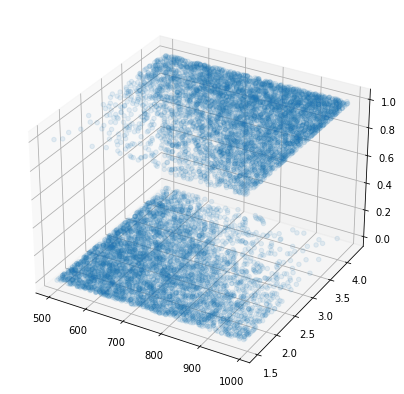

In [19]:
fig = plt.figure(figsize=(7,7)) 
ax = fig.add_subplot(1,1,1,projection='3d')
ax.scatter3D(x1,x2,y,alpha=0.1)

토익과 GPA로 취업여부를 판단하는 적절한 네트워크를 학습하라. 

(풀이)

In [70]:
X = torch.stack([x1,x2],axis=1)
y = y.reshape(-1,1) 

In [71]:
net = torch.nn.Linear(in_features=2,out_features=1)
optimizr = torch.optim.Adam(net.parameters())
loss_fn = torch.nn.BCEWithLogitsLoss()
for epoc in range(10000):
    ## 1
    yhat = net(X)
    ## 2
    loss = loss_fn(yhat,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [72]:
((yhat>0) == y).float().mean()

tensor(0.7890)

In [74]:
((v>0.5) == y.reshape(-1)).float().mean() ## true를 알고 있다고 가정하였을 경우 0.7938이 최대예측이므로, 0.79와 비슷할수록 잘 적합된 모형임 

tensor(0.7938)

## `3`. 과적합과 드랍아웃 

주어진 자료가 아래와 같다고 하자. 

In [10]:
torch.manual_seed(20) 
x=torch.linspace(0,1,200).reshape(200,1)
eps = torch.concat([torch.normal(0,0.1,[60,1]),torch.normal(0,0.075,[60,1]),torch.normal(0,0.05,[80,1])])
y=0.5*x+ eps

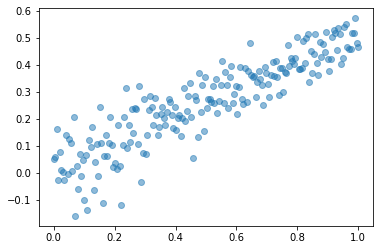

In [11]:
plt.plot(x,y,'o',alpha=0.5)

`(1)` 아래와 같이 자료를 분리하라. 
- ${\boldsymbol x}=(x_1,\dots,x_{200}) \to  {\boldsymbol x}_{train} = (x_1\dots,x_{150}), ~{\boldsymbol x}_{test}=(x_{151},\dots,x_{200})$
- ${\boldsymbol y}=(y_1,\dots,y_{200}) \to  {\boldsymbol y}_{train} = (y_1\dots,y_{150}), ~{\boldsymbol y}_{test}=(y_{151},\dots,y_{200})$

(풀이) 

In [12]:
xtr,xtest = x[:150], x[150:]
ytr,ytest = y[:150], y[150:]

`(2)` 아래의 코드를 완성하여 네트워크를 설계하고 MSELoss를 손실함수로 선택한 뒤 $\big( {\boldsymbol x}_{train},{\boldsymbol y}_{train}\big)$을 사용해 모형을 적합시켜라. (옵티마이저는 자유롭게 선택할 것) 
```python
net= torch.nn.Sequential(
    torch.nn.Linear(1,4096),
    torch.nn.ReLU(),
    torch.nn.Linear(???,???)
)
```

(풀이)

In [14]:
torch.manual_seed(43052)
net= torch.nn.Sequential(
    torch.nn.Linear(1,4096),
    torch.nn.ReLU(),
    torch.nn.Linear(4096,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

In [15]:
for epoc in range(10000):
    ## 1
    ## 2
    loss = loss_fn(net(xtr),ytr)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`(3)` $net({\boldsymbol x}_{test})$의 결과를 시각화 하라. 

(풀이) 

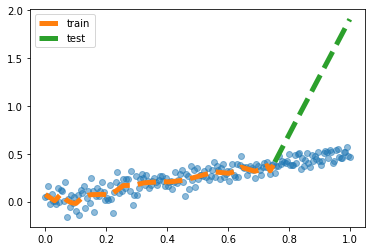

In [16]:
plt.plot(x,y,'o',alpha=0.5)
plt.plot(xtr,net(xtr).data,'--',label='train',lw=5)
plt.plot(xtest,net(xtest).data,'--',label='test',lw=5)
plt.legend() 

- plt.legend() 등을 사용하지않아도 감점 X 

`(4)` 아래와 같은 Dropout Layer를 (2)의 네트워크 중 적절한 위치에 추가하라. 그리고 다시 $\big( {\boldsymbol x}_{train},{\boldsymbol y}_{train}\big)$만을 사용해 모형을 재학습하라. 

```python
torch.nn.Dropout(0.5)
```

In [17]:
torch.manual_seed(43052)
net= torch.nn.Sequential(
    torch.nn.Linear(1,4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

In [18]:
for epoc in range(10000):
    ## 1
    ## 2
    loss = loss_fn(net(xtr),ytr)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`(5)` (4)에서 수정한 네트워크에 대한 $net({\boldsymbol x}_{test})$의 결과를 시각화 하라.

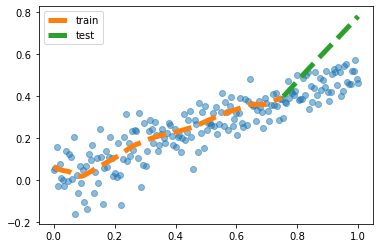

In [19]:
net.eval()
plt.plot(x,y,'o',alpha=0.5)
plt.plot(xtr,net(xtr).data,'--',label='train',lw=5)
plt.plot(xtest,net(xtest).data,'--',label='test',lw=5)
plt.legend() 

## `4`. Overparameterized Model -- (문제수정) 

아래와 같은 자료가 있다고 가정하자. 

In [20]:
x = torch.rand([1000,1])*2-1
y = 3.14 + 6.28*x + torch.randn([1000,1]) 

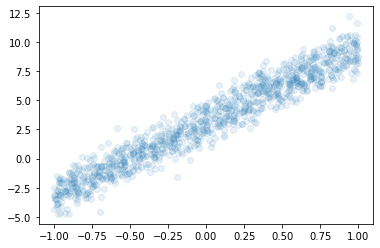

In [21]:
plt.plot(x,y,'o',alpha=0.1)

**hint: 이 모형은 $y_i = 3.14 + 6.28 x_i+ \epsilon_i$ 에서 생성 (기존 $y_i = 6.28 + 3.14 x_i +\epsilon_i$ 에서 수정)**

`(1)` 아래의 모형을 가정하고 $\beta_0,\beta_1$을 파이토치를 이용하여 추정하라. 

- $y_i = \beta_0  + \beta_1 x_i + \epsilon_i,\quad \epsilon_i \sim N(0,\sigma^2)$

(풀이) 

In [22]:
net = torch.nn.Linear(1,1) 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)

Text(0.5, 1.0, '$model:= \\beta_0+\\beta_1x_i$ (before learing)')

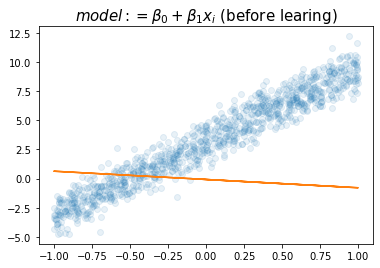

In [23]:
plt.plot(x,y,'o',alpha=0.1)
plt.plot(x,net(x).data,'-')
plt.title(r"$model:= \beta_0+\beta_1x_i$ (before learing)",size=15)

In [24]:
for epoc in range(100):
    ## 1 
    yhat = net(x) 
    ## 2 
    loss = torch.mean((yhat-y)**2)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

Text(0.5, 1.0, '$model:= \\beta_0+\\beta_1x_i$ (after 100 epochs)')

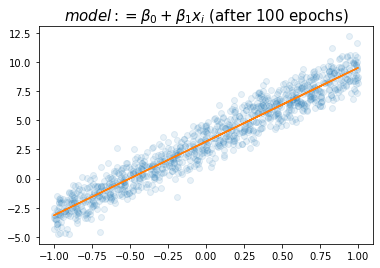

In [25]:
plt.plot(x,y,'o',alpha=0.1)
plt.plot(x,net(x).data,'-')
plt.title(r"$model:= \beta_0+\beta_1x_i$ (after 100 epochs)",size=15)

In [26]:
net.weight.data, net.bias.data

(tensor([[6.3289]]), tensor([3.1776]))

- 참값인 6.24, 3.14 가 적절하게 추정되었음 

`(2)` 아래의 모형을 가정하고 $\beta_0$를 파이토치를 이용하여 추정하라. 

- $y_i = \beta_0  + \epsilon_i,\quad \epsilon_i \sim N(0,\sigma^2)$

(풀이) 

In [27]:
w0hat = torch.tensor([0.00],requires_grad=True) 

Text(0.5, 1.0, '$model:= \\beta_0+0\\times x_i$ (before learing)')

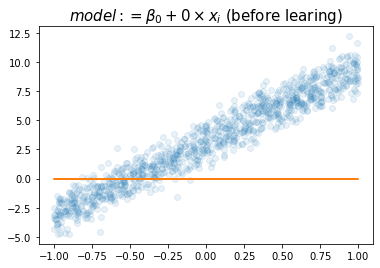

In [28]:
plt.plot(x,y,'o',alpha=0.1)
plt.plot(x,(x*0+w0hat).data,'-')
plt.title(r"$model:= \beta_0+0\times x_i$ (before learing)",size=15)

In [29]:
for epoc in range(100):
    ## 1 
    yhat = x*0 + w0hat 
    ## 2 
    loss = torch.mean((yhat-y)**2)
    ## 3 
    loss.backward()
    ## 4 
    w0hat.data = w0hat.data - 0.1 * w0hat.grad
    w0hat.grad = None

Text(0.5, 1.0, '$model:= \\beta_0+ 0\\times x_i$ (after 100 epochs)')

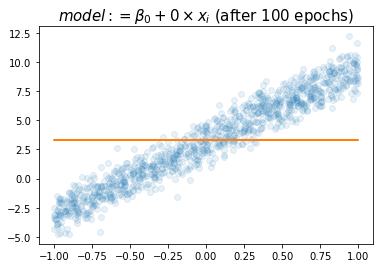

In [30]:
plt.plot(x,y,'o',alpha=0.1)
plt.plot(x,(x*0+w0hat).data,'-')
plt.title(r"$model:= \beta_0+ 0\times x_i$ (after 100 epochs)",size=15)

In [31]:
w0hat

tensor([3.2864], requires_grad=True)

- $w_0$의 참값인 3.14가 적절하게 추정되었음. 

(참고) 위에서 추정된 값은 이론적으로 아래와 같게 됩니다. 

In [32]:
y.mean() 

tensor(3.2864)

`(3)` 아래의 모형을 가정하고 $\beta_1$을 파이토치를 이용하여 추정하라. 

- $y_i = \beta_1x_i  + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$

(풀이) 

In [33]:
net = torch.nn.Linear(in_features=1,out_features=1,bias=False) 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1) 

Text(0.5, 1.0, '$model:= \\beta_1x_i$ (before learing)')

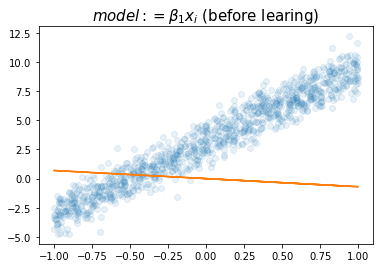

In [34]:
plt.plot(x,y,'o',alpha=0.1)
plt.plot(x,net(x).data,'-')
plt.title(r"$model:= \beta_1x_i$ (before learing)",size=15)

In [35]:
for epoc in range(100):
    ## 1 
    yhat = net(x) 
    ## 2 
    loss = torch.mean((y-yhat)**2)
    ## 3 
    loss.backward() 
    ## 4
    optimizr.step()
    optimizr.zero_grad() 

Text(0.5, 1.0, '$model:= \\beta_1x_i$ (after 100 epochs)')

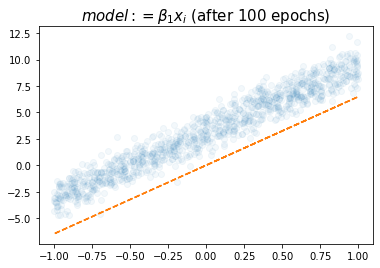

In [36]:
plt.plot(x,y,'o',alpha=0.05)
plt.plot(x,net(x).data,'--')
plt.title(r"$model:= \beta_1x_i$ (after 100 epochs)",size=15)

In [37]:
net.weight

Parameter containing:
tensor([[6.4900]], requires_grad=True)

- 참값인 6.28과 비슷하다. 

`(4)` 아래의 모형을 가정하고 $\alpha_0,\beta_0,\beta_1$을 파이토치를 이용하여 추정하라. 

- $y_i = \alpha_0+\beta_0+ \beta_1x_i  + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$

$\hat{\alpha}_0+\hat{\beta}_0$은 얼마인가? 이 값과  문제 (1)에서 추정된 $\hat{\beta_0}$의 값과 비교하여 보라. 

(풀이) 

In [38]:
_1 = torch.ones([1000,1])
X = torch.concat([_1,x],axis=1)

In [39]:
net = torch.nn.Linear(in_features=2,out_features=1) 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1) 

Text(0.5, 1.0, '$model:= (\\beta_0+\\alpha_0)+ \\beta_1x_i$ (before learing)')

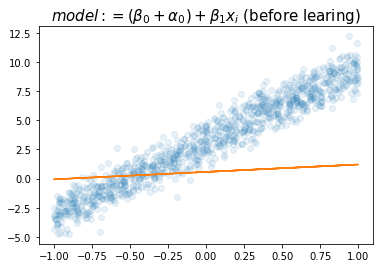

In [40]:
plt.plot(x,y,'o',alpha=0.1)
plt.plot(x,net(X).data,'-')
plt.title(r"$model:= (\beta_0+\alpha_0)+ \beta_1x_i$ (before learing)",size=15)

In [41]:
for epoc in range(100):
    ## 1 
    yhat = net(X) 
    ## 2 
    loss = torch.mean((y-yhat)**2)
    ## 3 
    loss.backward() 
    ## 4
    optimizr.step()
    optimizr.zero_grad() 

Text(0.5, 1.0, '$model:= (\\beta_0+\\alpha_0)+ \\beta_1x_i$ (after 100 epochs)')

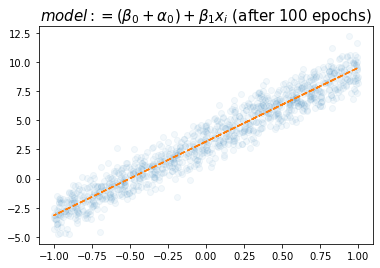

In [42]:
plt.plot(x,y,'o',alpha=0.05)
plt.plot(x,net(X).data,'--')
plt.title(r"$model:= (\beta_0+\alpha_0)+ \beta_1x_i$ (after 100 epochs)",size=15)

In [43]:
net.bias,net.weight

(Parameter containing:
 tensor([2.0016], requires_grad=True),
 Parameter containing:
 tensor([[1.1759, 6.3301]], requires_grad=True))

In [45]:
2.0016 + 1.1759

3.1774999999999998

- 2.0016 ($\alpha_0$의 추정치로 해석가능) 와 1.1759 ($\beta_0$의 추정치로 해석가능) 의 합이 (1)에서 추정된 값과 비슷하다. 
- 6.3301 ($\beta_1$의 추정치로 해석가능) 역시 (1)에서 추정된 값과 비슷하다. 

`(5)` 아래의 모형을 가정하고 $\alpha_0,\alpha_1,\beta_0,\beta_1$을 파이토치를 이용하여 추정하라. -- 이거 제가 힌트를 잘못줬어요.. 문제가 좀 어렵게나왔네요 ㅠㅠ

- $y_i = \alpha_0+\beta_0+ \beta_1x_i + \alpha_1x_i + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$ 

$\hat{\alpha}_0+\hat{\beta}_0$, $\hat{\alpha}_1 + \hat{\beta}_1$의 값은 각각 얼마인가? 이 값들을 (1) 에서 추정된 $\hat{\beta}_0$, $\hat{\beta}_1$ 값들과 비교하라. 

(풀이) 

In [46]:
X = torch.concat([_1,_1,x,x],axis=1) 
X

tensor([[ 1.0000,  1.0000,  0.8959,  0.8959],
        [ 1.0000,  1.0000, -0.4144, -0.4144],
        [ 1.0000,  1.0000, -0.1736, -0.1736],
        ...,
        [ 1.0000,  1.0000, -0.8677, -0.8677],
        [ 1.0000,  1.0000,  0.2317,  0.2317],
        [ 1.0000,  1.0000, -0.0644, -0.0644]])

In [47]:
net = torch.nn.Linear(in_features=4,out_features=1,bias=False) 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1) 

Text(0.5, 1.0, '$model:= (\\beta_0+\\alpha_0)+ (\\beta_1+\\alpha_1)x_i$ (before learing)')

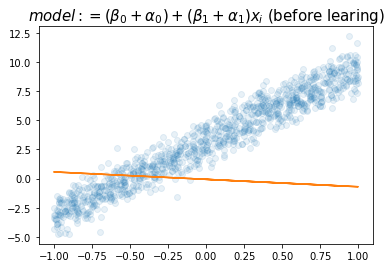

In [48]:
plt.plot(x,y,'o',alpha=0.1)
plt.plot(x,net(X).data,'-')
plt.title(r"$model:= (\beta_0+\alpha_0)+ (\beta_1+\alpha_1)x_i$ (before learing)",size=15)

In [49]:
for epoc in range(100):
    ## 1 
    yhat = net(X) 
    ## 2 
    loss = torch.mean((y-yhat)**2)
    ## 3 
    loss.backward() 
    ## 4
    optimizr.step()
    optimizr.zero_grad() 

Text(0.5, 1.0, '$model:= (\\beta_0+\\alpha_0)+ (\\beta_1+\\alpha_1)x_i$ (after 100 epochs)')

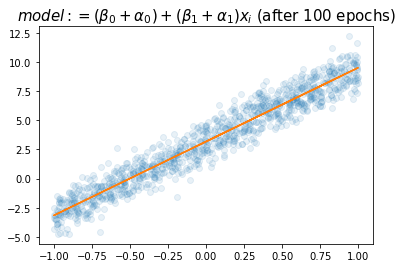

In [50]:
plt.plot(x,y,'o',alpha=0.1)
plt.plot(x,net(X).data,'-')
plt.title(r"$model:= (\beta_0+\alpha_0)+ (\beta_1+\alpha_1)x_i$ (after 100 epochs)",size=15)

In [51]:
net.weight

Parameter containing:
tensor([[1.2784, 1.8990, 3.2781, 3.0571]], requires_grad=True)

In [52]:
[1.2784+1.8990, 3.2781+3.0571]

[3.1774, 6.3352]

- $\hat{\alpha}_0+\hat{\beta}_0=3.1774$, $\hat{\alpha}_1+\hat{\beta}_1=6.3352$ 

`(6)` 다음은 위의 모형에 대하여 학생들이 discussion한 결과이다. 올바르게 해석한 학생을 모두 골라라. 

**민정**: $(x_i,y_i)$의 산점도는 직선모양이고 직선의 절펴과 기울기 모두 유의미해 보이므로 $y_i = \beta_0 + \beta_1 x_i$ 꼴을 적합하는게 좋겠다. 

**슬기**: 나도 그렇게 생각해. 그래서 (2)-(3)과 같이 기울기를 제외하고 적합하거나 절편을 제외하고 적합하면 underfitting의 상황에 빠질 수 있어. 

**성재**: (2)의 경우 사실상 $\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$를 추정하는 것과 같아지게 되지. 

**세민**: (4)의 경우 ${\bf X}=\begin{bmatrix} 1  & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_n \end{bmatrix}$ 와 같이 설정하고 네트워크를 아래와 같이 설정할 경우 얻어지는 모형이야. 
```python
net = torch.nn.Linear(in_features=2,out_features=1,bias=True)
```

**구환**: 모델 (4)-(5)는 표현력은 (1)과 동일하지만 추정할 파라메터는 (1)보다 많으므로 효율적인 모델이라고 볼 수 없어. 

(풀이) 

모두 맞게 서술함 

--- 

아래는 이 문제에 대한 몇 가지 해설입니다.

***under fitting*** 

(2)-(3)은 각각 원래직선의 기울기와 절편을 설명할 수 없는 구조이므로 모형의 표현력이 약한 상황이다. 따라서 underfitting 이 된다. 

***overparameterized model***

(4)-(5)는 (1)에 대비하여 학습할 파라메터는 상승하였으나 모형의 표현력은 (1)과 동일한 상황이다. 실제로 직선의 적합을 만들기 위해서는 기울기를 의미하는 파라메터와 절편을 의미하는 파라메터 2개로 충분하다. 하지만 (4)의 경우 절편을 표현함에 있어서 $\alpha_0, \beta_0$ 두 개의 파라메터를 썼으므로 파라메터의 낭비가 있다고 볼 수 있다. (5)의 경우 절편의 표현에서 파라메터의 낭비가 있었고 또한 기울기의 표현에서도 $\alpha_1,\beta_1$ 두 개의 파라메터를 사용하였으므로 낭비가 있다. 

전통적인 통계학에서는 이처럼 잘못계획된 모형이 파라메터를 추정할때 큰 방해요소이지만 경사하강법을 base로 학습하는 경우 크게 문제되지 않는다. ($\hat{\alpha}_0+\hat{\beta}_0$이 절편의 추정값 역할을, $\hat{\alpha}_1+\hat{\beta}_1$이 기울기의 추정값 역할을 한다.) 여기에서 "왜 pytorch나 tensorflow에서 구현되는 경사하강법 based method 에서는 문제가 되지 않는가?" 에 대한 질문에 답을 하기 위해서는 기계학습 혹은 회귀분석에서 다루는 능형회귀(ridge)를 이해해야 한다. 이 부분은 본 교과과정 범위 밖이라 생각하므로 자세한 서술은 생략한다. (궁금하면 메일로 물어보세요, 단 ridge를 이해한 상태에서 물어보셔야합니다) 

***overfiting***

단순히 파라메터를 많이 쓴다고 오버피팅이 되는건 아니다. 파라메터를 많이써서 모형의 표현력이 올라가야 오버피팅의 가능성이 있다. (4)-(5)의 경우 파라메터를 많이 썼으나 모형의 표현력이 상승한 것은 아니므로 오버피팅상황은 아니다. 

***(2)에서 절편만 정확하게 학습되는 이유*** 

결국 $loss=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2=\frac{1}{n}\sum_{i=1}^{n}(y_i-w_0)^2$ 와 같은 형태이다. 

경사하강법은 loss가 최소화되는 $w_0$를 찾아주는 방법인데, 경사하강법을 이용하지 않고 이론적으로 해결한다면 $\frac{\partial}{\partial w_0}loss=0$을 계산하여 풀면 된다. 

$\frac{\partial}{\partial w_0}loss=0 \Longleftrightarrow  \frac{1}{n}\sum_{i=1}^{n}(-2)(y_i-w_0)=0$ 이고

$\frac{1}{n}\sum_{i=1}^{n}(-2)(y_i-w_0)$를 $w_0$에 대하여 정리하면 $\hat{w}_0=\frac{1}{n}\sum_{i=1}^{n}y_i$ 이 된다. 

## `5`. 다음을 읽고 참 거짓을 판단하여라. 

`(1)` 로지스틱 모형은 Adam 옵티마이저가 아닐 경우 적합시키는 것이 불가능하다. (거짓) 